# NumPy基础

NumPy高效处理大数组的数据原因：
- 1.NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象
- 2.NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环

In [44]:
import numpy as np

In [45]:
a = np.arange(1000000)

In [46]:
l = list(range(1000000))

In [47]:
%time for _ in range(10): a2 = a * 2

Wall time: 33.9 ms


In [48]:
%time for _ in range(10): l2 = [x * 2 for x in l]

Wall time: 1.68 s


## 生成一个随机数数组：np.random

In [471]:
a = np.random.randn(2, 3)

In [472]:
a

array([[-1.88019309, -1.02274899,  0.74208579],
       [-1.77077189, -0.91971822,  0.85274326]])

简单数学运算

In [473]:
a * 10

array([[-18.80193085, -10.22748994,   7.42085785],
       [-17.70771885,  -9.19718224,   8.52743263]])

In [474]:
a + a

array([[-3.76038617, -2.04549799,  1.48417157],
       [-3.54154377, -1.83943645,  1.70548653]])

## 数组形状：shape

In [1117]:
a = np.random.randn(2, 3)

In [1118]:
# (m, n) 表示这个数组有m行n列
a.shape

(2, 3)

## 数组数据类型：dtype

In [1119]:
a = np.random.randn(2, 3)

In [1120]:
a.dtype

dtype('float64')

## 数组的秩(维度)：ndim

In [1121]:
a = np.random.randn(2, 3)

In [1122]:
a.ndim

2

## 创建数组

### n个列表创建数组：np.array(list)

根据一个列表创建一维数组

In [465]:
l = [6, 7.5, 8, 0, 1]

In [466]:
a = np.array(l)

In [467]:
a

array([6. , 7.5, 8. , 0. , 1. ])

根据嵌套列表创建多维数组

In [468]:
l = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [469]:
a = np.array(l)

In [470]:
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

### 只由元素0创建数组：np.zeros()

创建一维数组

In [454]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

创建指定形状的多维数组

In [478]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### 使用未初始化的数据创建数组：np.empty()

In [479]:
np.empty((2, 3, 2))

array([[[1.00940447e-311, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.03977794e-312, 2.57493440e-056]],

       [[6.52475435e-042, 4.03487970e+175],
        [2.14836339e+184, 3.53790665e-057],
        [4.98335353e-037, 1.00485913e-070]]])

### 由一系列连续的整数创建数组：np.arange()

In [70]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 创建数组时指定数据类型：np.array(..., dtype=)

In [480]:
a = np.array([1, 2, 3], dtype=np.float64)

In [481]:
a

array([1., 2., 3.])

In [482]:
a = np.array([1, 2, 3], dtype=np.int32)

In [483]:
a

array([1, 2, 3])

In [503]:
# 使用更简洁的方式
a = np.empty(8, dtype='u4')

In [504]:
a

array([3525042736,        475, 3524689232,        475, 3525034544,
              475, 3525035184,        475], dtype=uint32)

### 改变原数组的数据类型得到新数组：astype()

将整数转换成浮点数

In [484]:
a = np.array([1, 2, 3, 4, 5])

In [485]:
a

array([1, 2, 3, 4, 5])

In [487]:
a.dtype

dtype('int32')

In [488]:
b = a.astype(np.float64)

In [489]:
b

array([1., 2., 3., 4., 5.])

In [490]:
b.dtype

dtype('float64')

如果将浮点数转换成整数，则小数部分将会被截取删除

In [491]:
a = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [492]:
a

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [493]:
a.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

如果某字符串数组表示的全是数字，也可以用astype将其转换为数值形式

In [494]:
a = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [87]:
a

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [495]:
# 写的是float而不是np.float64，NumPy会将Python类型映射到等价的dtype上
a.astype(float)

array([ 1.25, -9.6 , 42.  ])

**注意：使用numpy.string_类型时，NumPy的字符串数据是大小固定的，发生截取时，不会发出警告**

可以将一个数组的dtype套用到另一个数组

In [496]:
a = np.arange(10)

In [498]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [497]:
b = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [499]:
b

array([0.22 , 0.27 , 0.357, 0.38 , 0.44 , 0.5  ])

In [500]:
a.astype(b.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

**调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同**

## 数组与标量的算术

数组与标量的算术运算会将标量值传播到各个元素

In [505]:
a = np.arange(1, 6)

In [506]:
a

array([1, 2, 3, 4, 5])

In [507]:
1 / a

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])

In [508]:
a ** 0.5

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798])

## 大小相同的数组之间的比较

会生成布尔值数组

In [509]:
a = np.array([[0., 4., 1.], [7., 2., 12.]])

In [510]:
a

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [511]:
b = np.array([[3, 4, 5], [6, 7, 8]])

In [512]:
b

array([[3, 4, 5],
       [6, 7, 8]])

In [513]:
b > a

array([[ True, False,  True],
       [False,  True, False]])

## 判断数组中哪些元素是/不是某个值

In [588]:
a = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [590]:
a == 'Bob'

array([ True, False, False,  True, False, False, False])

In [591]:
a != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

## 数组索引

跟列表最重要的区别在于，**数组切片是原始数组的视图**

这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上

### 一维数组索引

In [557]:
a = np.arange(10)

In [558]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [559]:
a[5]

5

In [560]:
a[5:8]

array([5, 6, 7])

In [561]:
a[5:8] = 12

In [562]:
a

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [563]:
arr_slice = a[5:8]

In [564]:
arr_slice

array([12, 12, 12])

In [565]:
arr_slice[1] = 12345

In [566]:
a

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [567]:
arr_slice[:] = 64

In [568]:
arr_slice

array([64, 64, 64])

In [569]:
a

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

### 多维数组索引

In [570]:
a = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [571]:
a

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [572]:
a[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [573]:
a[1][1]

array([10, 11, 12])

In [574]:
a[1][1][1]

11

In [550]:
old_values = a[0].copy()

In [551]:
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [575]:
a[0] = 42

In [576]:
a[0]

array([[42, 42, 42],
       [42, 42, 42]])

In [577]:
a

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [578]:
a[0] = old_values

In [582]:
a

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [586]:
a[0][0][1]

2

In [587]:
a[0][0][1:]

array([2, 3])

### 布尔型数组可用于数组索引

In [592]:
a = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [593]:
a

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [594]:
b = np.random.randn(7, 4)

In [595]:
b

array([[ 0.82471271, -0.25299275, -0.05494247,  0.6692372 ],
       [-0.07488872, -0.96363499, -0.49205483,  1.27117861],
       [ 0.43152212,  1.25556018, -1.21242774, -1.04114603],
       [ 0.19408604, -1.3917118 , -0.15378478,  1.37959935],
       [-0.44644839,  0.39670244, -1.68421562,  0.12130571],
       [-1.99420753,  0.10674984,  0.67812743,  0.82502045],
       [-1.85551367, -0.89320206,  0.52293883,  0.39365337]])

In [596]:
a == 'Bob'

array([ True, False, False,  True, False, False, False])

In [597]:
# 布尔型数组中只有第一个和第四个是True
# 在这里相当于在数组中获取第一行和第四行的数据
b[a == 'Bob']

array([[ 0.82471271, -0.25299275, -0.05494247,  0.6692372 ],
       [ 0.19408604, -1.3917118 , -0.15378478,  1.37959935]])

In [599]:
# 获取第一行和第四行数据，并且是第三列及后面所有列的数据
b[a == 'Bob', 2:]

array([[-0.05494247,  0.6692372 ],
       [-0.15378478,  1.37959935]])

In [600]:
# 获取第一行和第四行的第四列数据
b[a == 'Bob', 3]

array([0.6692372 , 1.37959935])

**注意：如果布尔型数组的长度不对，布尔型选择就会出错，因此一定要小心**

要选择除"Bob"以外的其他值，既可以使用不等于符号（!=），也可以通过~对条件进行否定

In [1123]:
a = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [1125]:
b = np.random.randn(7, 4)

In [1124]:
a != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [602]:
b[~(a == 'Bob')]

array([[-0.07488872, -0.96363499, -0.49205483,  1.27117861],
       [ 0.43152212,  1.25556018, -1.21242774, -1.04114603],
       [-0.44644839,  0.39670244, -1.68421562,  0.12130571],
       [-1.99420753,  0.10674984,  0.67812743,  0.82502045],
       [-1.85551367, -0.89320206,  0.52293883,  0.39365337]])

~操作符用来反转条件很好用

In [1126]:
a = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [1128]:
b = np.random.randn(7, 4)

In [1127]:
cond = a == 'Bob'

In [604]:
b[~cond]

array([[-0.07488872, -0.96363499, -0.49205483,  1.27117861],
       [ 0.43152212,  1.25556018, -1.21242774, -1.04114603],
       [-0.44644839,  0.39670244, -1.68421562,  0.12130571],
       [-1.99420753,  0.10674984,  0.67812743,  0.82502045],
       [-1.85551367, -0.89320206,  0.52293883,  0.39365337]])

选取这三个名字中的两个需要组合应用多个布尔条件，使用&（和）、|（或）之类的布尔算术运算
符即可

In [605]:
mask = (a == 'Bob') | (a == 'Will')

In [606]:
mask

array([ True, False,  True,  True,  True, False, False])

In [607]:
b[mask]

array([[ 0.82471271, -0.25299275, -0.05494247,  0.6692372 ],
       [ 0.43152212,  1.25556018, -1.21242774, -1.04114603],
       [ 0.19408604, -1.3917118 , -0.15378478,  1.37959935],
       [-0.44644839,  0.39670244, -1.68421562,  0.12130571]])

**通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此**

通过布尔型数组设置值是一种经常用到的手段

In [1129]:
b = np.random.randn(7, 4)

In [1130]:
# 将data中的所有负值都设置为0
b[b < 0] = 0

In [1131]:
b

array([[2.14397297, 0.        , 0.        , 0.        ],
       [0.54468196, 0.        , 0.85774121, 0.25564886],
       [0.        , 0.        , 0.2808867 , 0.0525679 ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.67856341, 0.08276652, 0.73293971, 0.04894436],
       [0.15961681, 0.        , 1.68411923, 0.00720363],
       [0.        , 0.07962753, 0.        , 0.        ]])

通过一维布尔数组设置整行或列的值也很简单

In [610]:
b[a != 'Joe'] = 7

In [611]:
b

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 1.27117861],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.10674984, 0.67812743, 0.82502045],
       [0.        , 0.        , 0.52293883, 0.39365337]])

### 花式索引

指的是利用整数数组进行索引

In [614]:
a = np.empty((8, 4))

In [615]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [617]:
for i in range(8):
    a[i] = i

In [618]:
a

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可

In [619]:
a[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

使用负数索引将会从末尾开始选取行

In [620]:
a[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组来表示获取第几行第几列的元素

In [621]:
a = np.arange(32).reshape((8, 4))

In [622]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [623]:
# 获取第2行第1列元素、第6行第4列元素、第8行第2列元素、第3行第3列元素
# 最终选出的是元素(1,0)、(5,3)、(7,1)和(2,2)
a[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

**花式索引跟切片不一样，它总是将数据复制到新数组中**

## 数组转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）

In [624]:
a = np.arange(15).reshape((3, 5))

In [625]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [626]:
# 简单的转置可以使用.T，它其实就是进行轴对换而已
a.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置

In [183]:
a = np.arange(16).reshape((2, 2, 4))

In [184]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [186]:
a.transpose((2, 0, 1))

array([[[ 0,  4],
        [ 8, 12]],

       [[ 1,  5],
        [ 9, 13]],

       [[ 2,  6],
        [10, 14]],

       [[ 3,  7],
        [11, 15]]])

ndarray还有一个swapaxes方法，它需要接受一对轴编号

In [1132]:
a = np.arange(16).reshape((2, 2, 4))

In [1133]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [1134]:
a.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

**swapaxes也是返回源数据的视图**

## 平方根：np.sqrt()

In [643]:
a = np.arange(10)

In [644]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [645]:
# 平方根
np.sqrt(a)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

## e的幂次方：np.exp()

In [1135]:
a = np.arange(10)

In [1136]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [632]:
# 返回e的幂次方,e是一个常数为2.71828
np.exp(a)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

## 获取两个数组对比后更大的元素：np.maximum(a,b)

In [633]:
a = np.random.randn(8)

In [634]:
a

array([-2.07544883,  0.2290192 ,  0.64792942,  0.32266168, -1.21391381,
       -0.18064995, -0.95170959,  1.31335024])

In [635]:
b = np.random.randn(8)

In [636]:
b

array([ 0.17386795,  1.47954038,  0.49056335,  0.16464261, -0.75664879,
       -1.37720127,  0.8206984 , -1.31437094])

In [637]:
np.maximum(a, b)

array([ 0.17386795,  1.47954038,  0.64792942,  0.32266168, -0.75664879,
       -0.18064995,  0.8206984 ,  1.31335024])

## 返回浮点数数组的小数和整数部分：np.modf()

In [638]:
a = np.random.randn(7) * 5

In [639]:
a

array([-4.13545666, -8.41391181,  6.14794484,  4.20703594,  3.2962025 ,
       -2.32165177,  3.63922261])

In [640]:
remainder, whole_part = np.modf(a)

In [641]:
remainder

array([-0.13545666, -0.41391181,  0.14794484,  0.20703594,  0.2962025 ,
       -0.32165177,  0.63922261])

In [642]:
whole_part

array([-4., -8.,  6.,  4.,  3., -2.,  3.])

## 用n个坐标轴上的点在平面上画网格：np.meshgrid()

np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）

In [648]:
a = np.arange(1, 6)

In [649]:
a

array([1, 2, 3, 4, 5])

In [652]:
b = np.arange(6, 11)

In [653]:
b

array([ 6,  7,  8,  9, 10])

In [654]:
c = np.meshgrid(a, b)

In [655]:
c

[array([[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]]),
 array([[ 6,  6,  6,  6,  6],
        [ 7,  7,  7,  7,  7],
        [ 8,  8,  8,  8,  8],
        [ 9,  9,  9,  9,  9],
        [10, 10, 10, 10, 10]])]

In [656]:
m, n = np.meshgrid(a, b)

In [657]:
m

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [658]:
n

array([[ 6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10]])

使用matplotlib创建一个二维数组的可视化

In [210]:
points = np.arange(-5, 5, 0.01)

In [647]:
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [659]:
xs, ys = np.meshgrid(points, points)

In [660]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [661]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [662]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [663]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [664]:
import matplotlib.pyplot as plt

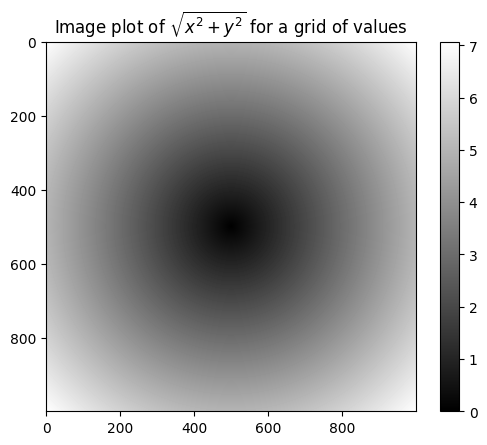

In [665]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

## 三元表达式x if x else y的矢量化版本：np.where()

In [666]:
x = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [667]:
y = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [668]:
cond = np.array([True, False, True, True, False])

现在使用 Python 的列表推导式示例

根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则
从yarr中选取

In [669]:
ret = [(x if c else y) for x, y, c in zip(x, y, cond)]

In [670]:
ret

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题：
- 第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成
的）
- 第二，无法用于多维数组

若使用np.where，则可以将该功能写得非常简洁

In [671]:
ret = np.where(cond, x, y)

In [672]:
ret

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值

假设有一个由随机数据组成的矩阵，要将所有正值替换为2，将所有负值替换为－2

In [673]:
a = np.random.randn(4, 4)

In [674]:
a

array([[-0.68028457, -0.2547876 , -1.5459666 ,  1.50023025],
       [ 0.7691103 ,  1.75835223,  0.2887166 ,  0.00195605],
       [-0.23770687, -1.57100785, -0.1002092 , -0.98367044],
       [-0.29381748, -0.83397395, -1.41321577, -0.69838142]])

In [675]:
 a > 0

array([[False, False, False,  True],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [676]:
np.where(a > 0, 2, -2)

array([[-2, -2, -2,  2],
       [ 2,  2,  2,  2],
       [-2, -2, -2, -2],
       [-2, -2, -2, -2]])

In [677]:
a

array([[-0.68028457, -0.2547876 , -1.5459666 ,  1.50023025],
       [ 0.7691103 ,  1.75835223,  0.2887166 ,  0.00195605],
       [-0.23770687, -1.57100785, -0.1002092 , -0.98367044],
       [-0.29381748, -0.83397395, -1.41321577, -0.69838142]])

使用np.where，可以将标量和数组结合起来。例如，可用常数2替换arr中所有正的值

In [678]:
np.where(a > 0, 2, a)

array([[-0.68028457, -0.2547876 , -1.5459666 ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.23770687, -1.57100785, -0.1002092 , -0.98367044],
       [-0.29381748, -0.83397395, -1.41321577, -0.69838142]])

In [679]:
a

array([[-0.68028457, -0.2547876 , -1.5459666 ,  1.50023025],
       [ 0.7691103 ,  1.75835223,  0.2887166 ,  0.00195605],
       [-0.23770687, -1.57100785, -0.1002092 , -0.98367044],
       [-0.29381748, -0.83397395, -1.41321577, -0.69838142]])

## 平均值：mean()

In [680]:
a = np.random.randn(5, 4)

In [681]:
a

array([[ 0.59840421,  1.68011624,  0.69650475, -0.10198117],
       [ 0.45090849,  1.86338286, -1.43269119, -0.53723816],
       [-1.11187584, -1.55995503, -0.31194753,  0.93331701],
       [ 0.07420272,  1.01691006,  0.50682744,  1.23502338],
       [ 0.40897216,  1.80495159,  0.29652818,  0.82171208]])

获取所有元素相加之后的平均值

In [682]:
a.mean()

0.3666036127415167

In [683]:
# 写法不同，获取平均值结果一样
np.mean(a)

0.3666036127415167

计算数组中每一行的平均值

In [686]:
a.mean(axis=1)

array([ 0.71826101,  0.0860905 , -0.51261535,  0.7082409 ,  0.833041  ])

## 求和：sum()

获取所有元素相加之后的平均值

In [1137]:
a = np.random.randn(5, 4)

In [1138]:
a.sum()

4.2364450264752875

计算数组中每一列的和

In [689]:
a.sum(axis=0)

array([ 0.42061173,  4.80540572, -0.24477835,  2.35083315])

计算生成的100个随机数中有多少个是大于0的

In [699]:
a = np.random.randn(100)

In [700]:
(a > 0).sum()

53

## 数据依次累加：cumsum()

一维数组依次累加

In [690]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [691]:
a.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

多维数组按行按列累加

In [692]:
a = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [693]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [694]:
# 计算每一列的累计和
a.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

## 数据依次累计积：cumprod()

计算每一行的累计积

In [707]:
a = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [708]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [709]:
a.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 数组中是否存在一个或多个True：any()

In [710]:
a = np.array([False, False, True, False])

In [711]:
a.any()

True

## 数组中所有值是否都是True：all()

In [1139]:
a = np.array([False, False, True, False])

In [1140]:
a.all()

False

这两个方法也能用于非布尔型数组，所有非0元素将会被当做True

## 数组排序：sort()

一维数组排序

In [713]:
a = np.random.randn(6)

In [714]:
a

array([ 0.71001713, -0.86556033, -0.13748374,  0.08371081,  0.08496666,
        0.72269387])

In [715]:
a.sort()

In [716]:
a

array([-0.86556033, -0.13748374,  0.08371081,  0.08496666,  0.71001713,
        0.72269387])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可

In [717]:
a = np.random.randn(5, 3)

In [718]:
a

array([[-1.94639997, -0.90799018,  0.40003996],
       [ 0.93442382,  0.6091473 , -1.07863843],
       [ 1.56274788,  1.02841752,  0.29189765],
       [ 0.83471591, -1.40990607, -0.58350775],
       [ 0.00713338,  0.98508259, -1.18213938]])

对数组的每一行的元素进行排序

In [719]:
a.sort(1)

In [720]:
a

array([[-1.94639997, -0.90799018,  0.40003996],
       [-1.07863843,  0.6091473 ,  0.93442382],
       [ 0.29189765,  1.02841752,  1.56274788],
       [-1.40990607, -0.58350775,  0.83471591],
       [-1.18213938,  0.00713338,  0.98508259]])

## 数组中的唯一值并返回已排序的结果：np.unique(array)

In [721]:
a = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [722]:
np.unique(a)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [723]:
a = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [724]:
np.unique(a)

array([1, 2, 3, 4])

**np.unique()等价于纯Python的sorted(set())，也就是说去重之后还会自动排序**

## 数组a的值在数组b中是否存在：np.in1d()

In [725]:
a = np.array([6, 0, 0, 3, 2, 5, 6])

In [726]:
np.in1d(a, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 一个数组保存到文件：np.save()

默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中

如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上

保存一个数组到文件中

In [730]:
a = np.arange(10)

In [731]:
np.save('some_array', a)

## 多个数组保存到文件：np.savez()

In [1141]:
a = np.arange(10)

In [1142]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [746]:
np.savez('array_archive.npz', a=a, b=a)

## 多个数组压缩后保存到文件：np.savez_compressed()

In [1143]:
a = np.arange(10)

In [747]:
np.savez_compressed('arrays_compressed.npz', a=a, b=a)

## 加载数组文件内容：np.load()

In [735]:
a = np.load('some_array.npy')

In [736]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [741]:
b = np.load('array_archive.npz')

In [742]:
b

In [743]:
b['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [744]:
b['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 两个数组的点积(元素对应相乘)：dot()

### 向量点积

对于两个一维的数组，计算的是这两个数组对应下标元素的乘积和(数学上称之为向量点积)

In [766]:
a = np.array([1, 2, 3])

In [767]:
b = np.array([4, 5, 6])

In [769]:
# 1 * 4 + 2 * 5 + 3 * 6 = 32
np.dot(a, b)

32

一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组

In [791]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])

In [792]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [793]:
b

array([7, 8, 9])

In [794]:
np.dot(a, b)

array([ 50., 122.])

@符也可以用作中缀运算符，进行矩阵乘法

In [795]:
a @ b

array([ 50., 122.])

### 矩阵乘积

对于二维数组，计算的是两个数组的矩阵乘积

数组a的每一行每个元素依次与数组b的每一列每一个元素相乘的和

示例1：

In [770]:
a = np.array([[1,2],[3,4]])

In [771]:
a

array([[1, 2],
       [3, 4]])

In [772]:
b = np.array([[11,12],[13,14]])

In [773]:
b

array([[11, 12],
       [13, 14]])

In [776]:
# [
#     [1*11+2*13, 1*12+2*14],
#     [3*11+4*13, 3*12+4*14]
# ]
np.dot(a, b)

array([[37, 40],
       [85, 92]])

示例2：

In [779]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])

In [780]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [781]:
b = np.array([[6., 23.], [-1, 7], [8, 9]])

In [782]:
b

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [783]:
a.dot(b)

array([[ 28.,  64.],
       [ 67., 181.]])

In [784]:
#     1 * 6 + 2 * (-1) + 3 * 8 = 28
#     1 * 23 + 2 * 7 + 3 * 9 = 64
#     4 * 6 + 5 * (-1) + 6 * 8 = 67
#     4 * 23 + 5 * 7 + 6 * 9 = 181

In [785]:
np.dot(a, b)

array([[ 28.,  64.],
       [ 67., 181.]])

## 计算矩阵的乘法逆矩阵：inv

逆矩阵（inverse matrix）：

设A是数域上的一个n阶矩阵，若在相同数域上存在另一个n阶矩阵B，使得： AB=BA=E

则称B是A的逆矩阵，而A则被称为可逆矩阵。注：E为单位矩阵

In [298]:
from numpy.linalg import inv, qr

In [797]:
a = np.array([[1, 2], [3, 4]])

In [798]:
a

array([[1, 2],
       [3, 4]])

In [799]:
b = np.linalg.inv(a)

In [800]:
b

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

获取逆矩阵后，再计算矩阵乘积就会得到一个单位矩阵

In [802]:
# 1 * -2 + 2 * 1.5 = 1
# 1 * 1 + 2 * -0.5 = 0
# 3 * -2 + 4 * 1.5 = 0
# 3 * 1 + 4 * -0.5 = 1
np.dot(a, b)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# Pandas基础

## 一维数组对象：pd.Series()

Series是一种类似于一维数组的对象

它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成

In [803]:
import pandas as pd

In [814]:
a = pd.Series([4, 7, -5, 3])

In [815]:
a

0    4
1    7
2   -5
3    3
dtype: int64

Series的字符串表现形式为：索引在左边，值在右边

In [816]:
a.index

RangeIndex(start=0, stop=4, step=1)

In [817]:
a.values

array([ 4,  7, -5,  3], dtype=int64)

如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series

In [830]:
d = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [831]:
a = pd.Series(d)

In [832]:
a

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

## 根据索引获取Series的值

In [1144]:
d = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [1145]:
a = pd.Series(d)

In [1146]:
a[0]

35000

In [1147]:
a[1:]

Texas     71000
Oregon    16000
Utah       5000
dtype: int64

如果某个索引对应多个值，则返回一个Series；而对应单个值的，则返回一个标量值

In [1305]:
a = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [1306]:
a

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [1307]:
a['a']

a    0
a    1
dtype: int64

In [1308]:
a['b']

b    2
b    3
dtype: int64

In [1309]:
a['c']

4

## Series索引排序：sort_index()

In [1263]:
a = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [1264]:
a

d    0
a    1
b    2
c    3
dtype: int64

In [1265]:
a.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

## 按值对Series进行排序：sort_values()

In [1272]:
a = pd.Series([4, 7, -3, 2])

In [1273]:
a

0    4
1    7
2   -3
3    2
dtype: int64

In [1274]:
a.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

## Series分配平均排名：rank()

In [1287]:
a = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [1288]:
a

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [1290]:
a.sort_values()

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
dtype: int64

In [1291]:
# 上面排序后的列表 li [-5, 0, 2, 4, 4, 7, 7]
# 这里索引 0 对应的元素是7，而 7 在列表 li 中有两个，分别排在第六名、第七名
# 因此 元素 7 的平均排名：(6 + 7)/2 = 6.5
# 其他的依次类推，只有单个元素的排在第几，平均排名就是第几
a.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

可以根据值在原数据中出现的顺序给出排名

这样的话每个元素都有一个整数类型的排名，而不会出现小数的情况

In [1292]:
a

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [1294]:
a.sort_values()

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
dtype: int64

In [1293]:
# 上面排序后的列表 li [-5, 0, 2, 4, 4, 7, 7]
# li 中有两个7
# 首先索引 0 对应的元素是7，但索引0是第一个索引顺序，因此它对应的平均排名是第六名
# 也就是说索引 2 对应的元素虽然是7，但索引2是第三个索引顺序，因此平均排名是第七名
# 其他的依次类推，单个的直接按从小到大进行平均排名即可
a.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

可以降序排名

In [1296]:
a.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

## 排序时任何缺失值默认都会被放到Series的末尾

In [1275]:
a = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [1276]:
a

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [1277]:
a.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

## 自定义Series索引：pd.Series([], index=[])

In [1254]:
a = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [955]:
a

d    4
b    7
a   -5
c    3
dtype: int64

In [956]:
a.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [957]:
a['a']

-5

In [958]:
# ['c', 'a', 'd']是索引列表，即使它包含的是字符串而不是整数
a[['c', 'b', 'd']]

c    3
b    7
d    4
dtype: int64

In [960]:
# 与Python切片不同，索引'a'是包含的
a['d': 'a']

d    4
b    7
a   -5
dtype: int64

如果只传入一个字典，则结果Series中的索引就是原字典的键（有序排列）

因此可以传入排好序的字典的键以改变顺序

In [853]:
d = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [854]:
a = pd.Series(d)

In [855]:
a

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [835]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [836]:
a = pd.Series(d, index=states)

In [837]:
a

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

上面sdata字典中虽然有Utah这个键，但是作为索引的states里面却没有，因此Utah及对应的值会从结果中除去

也就是说，如果指定了index，则只会根据index指定的索引来寻找对应的值来生成数据

如果有的索引没有对应的值，则结果是NaN（表示缺失数据）

## Series带有重复标签的轴索引：is_unique

In [1301]:
a = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [1302]:
a

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [1303]:
a.index

Index(['a', 'a', 'b', 'b', 'c'], dtype='object')

In [1304]:
a.index.is_unique

False

## Series唯一值数组：unique()

In [1342]:
a = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [1343]:
a

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [1344]:
uniques = a.unique()

In [1348]:
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

## 根据切片索引更改Series值

In [1152]:
a = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [1153]:
a

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [1154]:
a['d':'a'] = 5

In [1155]:
a

d    5.0
b    5.0
a    5.0
c    3.6
dtype: float64

## 修改Series索引

In [860]:
a = pd.Series([4, 7, -5, 3])

In [861]:
a

0    4
1    7
2   -5
3    3
dtype: int64

In [862]:
a.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [863]:
a

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## 根据旧数组重新索引创建新数组：reindex()

In [918]:
a = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [919]:
a

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [922]:
b = a.reindex(['a', 'b', 'c', 'd', 'e'])

In [923]:
b

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理

例如，使用ffill可以实现前向值填充

In [924]:
a = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [925]:
a

0      blue
2    purple
4    yellow
dtype: object

In [926]:
a.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [927]:
a.reindex(range(3), method='ffill')

0      blue
1      blue
2    purple
dtype: object

## Series与数值操作

In [838]:
a = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [839]:
a

d    4
b    7
a   -5
c    3
dtype: int64

In [840]:
a > 0

d     True
b     True
a    False
c     True
dtype: bool

In [841]:
a[a > 0]

d    4
b    7
c    3
dtype: int64

In [842]:
a * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [843]:
np.exp(a)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

## 判断某个值是否在Series中：in

In [1380]:
a = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [1381]:
a

d    4
b    7
a   -5
c    3
dtype: int64

In [1382]:
'b' in a

True

In [1383]:
mask = a.isin([4, 8, -5])

In [1384]:
mask

d     True
b    False
a     True
c    False
dtype: bool

In [1385]:
a[mask]

d    4
a   -5
dtype: int64

## 索引数组：get_indexer()

与isin类似的是Index.get_indexer方法

它可以给你一个索引数组，从可能包含重复值的数组到另一个不同值的数组

In [1386]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [1387]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [1388]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

## 计算Series中各值出现的频率：value_counts()

In [1360]:
a = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [1361]:
a.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [1362]:
pd.value_counts(a.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

## 检测缺失数据：isnull、notnull

In [844]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [845]:
a = pd.Series(d, index=states)

In [846]:
a

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [847]:
pd.isnull(a)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [848]:
pd.notnull(a)

state
California    False
Ohio           True
Oregon         True
Texas          True
Name: population, dtype: bool

In [849]:
a.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

## Series根据运算的索引标签自动对齐数据

In [1158]:
d = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [1159]:
a = pd.Series(d)

In [1160]:
a

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [1161]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [1162]:
b = pd.Series(d, index=states)

In [1163]:
b

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [1164]:
a + b

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

## Series对象本身及其索引都有的属性：name

In [1167]:
d = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [1168]:
a = pd.Series(d)

In [1169]:
a

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [1170]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [1171]:
b = pd.Series(d, index=states)

In [1172]:
b

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [1173]:
b.name = 'population'

In [1174]:
b.index.name = 'state'

In [1175]:
b

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

## 删除指定行生成新对象：drop()

In [934]:
a = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [935]:
a

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [936]:
b = a.drop('c')

In [937]:
b

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [938]:
a

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [939]:
a.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

## 字典创建df：pd.DataFrame({})

DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）

In [965]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [891]:
df = pd.DataFrame(d)

In [892]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


DataFrame会自动加上索引，**且全部列会被有序排列**

如果嵌套字典传给DataFrame，pandas就会被解释为：外层字典的键作为列，内层键则作为行索引

In [912]:
d = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [913]:
d

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [914]:
df = pd.DataFrame(d)

In [915]:
df

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


## df转置：df.T

In [1176]:
d = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [1177]:
df = pd.DataFrame(d)

In [1178]:
df

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [1179]:
df.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


## 读取df前n行：df.head(n)

df.head()不传参默认读取前五行数据

In [1180]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1181]:
df = pd.DataFrame(d)

In [1182]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [871]:
df.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [872]:
df.head(2)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7


## 自定义列序列：pd.DataFrame(..., columns=[])

In [1100]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1101]:
df = pd.DataFrame(d)

In [1102]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [1103]:
# 上面是 state year pop 的列排列方式
# 指定后，就变成 year state pop
df = pd.DataFrame(d, columns=['year', 'state', 'pop'])

In [1104]:
df

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果自定义列序列中有的列名在数据中找不到，则结果中会产生缺失值

In [1105]:
d

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1106]:
# data 字典中没有 debt 对应的数据
columns = ['year', 'state', 'pop', 'debt']

In [1107]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1108]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1109]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


## 获取df列数据：df['字段名']

通过类似字典标记的方式或属性的方式，可以将DataFrame的列获取为一个Series

返回的Series拥有原DataFrame相同的索引，且其name属性也已经被相应地设置好了

In [1183]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1184]:
columns = ['year', 'state', 'pop', 'debt']

In [1185]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1186]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1187]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [1188]:
df['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [1189]:
df.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

**df2[column]适用于任何列的名，但是df2.column只有当列名是一个合理的Python变量名时才适用**

In [1190]:
df[['year', 'pop']]

,year,pop
one,2000,1.5
two,2001,1.7
three,2002,3.6
four,2001,2.4
five,2002,2.9
six,2003,3.2


## 获取符合条件的df列数据

In [1191]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1192]:
columns = ['year', 'state', 'pop', 'debt']

In [1194]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1195]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1196]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [1114]:
cond = df['pop'] > 2.5

In [1115]:
cond

one      False
two      False
three     True
four     False
five      True
six       True
Name: pop, dtype: bool

In [1116]:
df[df['pop'] > 2.5]

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


## 修改df列数据：df['列名'] = ''

In [1197]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1198]:
columns = ['year', 'state', 'pop', 'debt']

In [1199]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1200]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1201]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [1009]:
df['debt'] = 15

In [1010]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,15
two,2001,Ohio,1.7,15
three,2002,Ohio,3.6,15
four,2001,Nevada,2.4,15
five,2002,Nevada,2.9,15
six,2003,Nevada,3.2,15


In [1011]:
df['debt'] = np.arange(6)

In [1012]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


可以使用Series给DataFrame某一列赋值，所有的空位都将被填上缺失值

In [1013]:
val = pd.Series([-1.2, -1.5, -1.7], index=[0, 4, 8])

In [1014]:
df['debt'] = val

In [1015]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


## 新增df列数据：df[''] = series

In [1202]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1203]:
columns = ['year', 'state', 'pop', 'debt']

In [1204]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1205]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1206]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [1207]:
df['eastern'] = df.state == 'Ohio'

In [1208]:
df

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


## 删除df列数据：del df['列名']

In [1210]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1211]:
columns = ['year', 'state', 'pop', 'debt']

In [1212]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1213]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1216]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [1218]:
df['eastern'] = df.state == 'Ohio'

In [1219]:
df

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [1220]:
del df['eastern']

In [1221]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


## 获取df行列数据：df.loc[]/df.iloc[]

In [1310]:
d = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
     'year': [2000, 2001, 2002, 2001, 2002, 2003],
     'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [1311]:
columns = ['year', 'state', 'pop', 'debt']

In [1312]:
index = ['one', 'two', 'three', 'four', 'five', 'six']

In [1313]:
df = pd.DataFrame(d, columns=columns, index=index)

In [1314]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [1315]:
df.loc['one']

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: one, dtype: object

In [1316]:
df[:3]

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN


获取指定行指定列数据

In [1317]:
df.loc['three', ['year', 'pop']]

year    2002
pop      3.6
Name: three, dtype: object

In [1318]:
df.iloc[2, [3, 0, 1]]

debt      NaN
year     2002
state    Ohio
Name: three, dtype: object

In [1319]:
df.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [1320]:
df.iloc[[1, 2], [1, 3, 0]]

,state,debt,year
two,Ohio,NaN,2001
three,Ohio,NaN,2002


In [1321]:
df.loc[:'five', 'year']

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [1322]:
df.iloc[:, :3][df.year > 2002]

,year,state,pop
six,2003,Nevada,3.2


如果某个索引对应多个值，则返回一个Series；而对应单个值的，则返回一个标量值

In [1324]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [1325]:
df

,0,1,2
a,1.117338,-0.722634,-0.473466
a,0.105599,0.364719,-0.219063
b,0.319787,1.683230,0.468757
b,0.304776,0.333224,1.662970


In [1326]:
df.loc['b']

,0,1,2
b,0.319787,1.683230,0.468757
b,0.304776,0.333224,1.662970


## 修改df行数据

In [990]:
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                  index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                  columns=['one', 'two', 'three', 'four'])

In [991]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [992]:
df < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [993]:
df[df < 5] = 0

In [994]:
df

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## 修改df行索引和列索引：df.reindex()

In [1074]:
df = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                  index=['a', 'c', 'd'], 
                  columns=['Ohio', 'Texas', 'California'])

In [1075]:
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [1076]:
df2 = df.reindex(['a', 'b', 'c', 'd'])

In [1077]:
df2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [1078]:
states = ['Texas', 'Utah', 'California']

In [1079]:
df.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


重新索引时，可指定一个填充值

In [1080]:
df.reindex(columns=states, fill_value=0)

,Texas,Utah,California
a,1,0,2
c,4,0,5
d,7,0,8


## 删除df行和列：drop()

删除df行，如果不指定inplace=True，则生成新的df；反之修改原来的df

In [1047]:
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                  index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                  columns=['one', 'two', 'three', 'four'])

In [941]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [942]:
df2 = df.drop(['Colorado', 'Ohio'])

In [943]:
df2

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [944]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


删除df列

In [945]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [946]:
delete_df = df.drop('two', axis=1)

In [947]:
delete_df

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [948]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [949]:
delete_df = df.drop(['two', 'four'], axis='columns')

In [950]:
delete_df

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [951]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [952]:
df.drop('two', axis=1, inplace=True)

In [953]:
df

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


## df算术运算时数据对齐

In [1048]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), 
                   columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])

In [1049]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [1050]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                   columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [1051]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [1052]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'列不是都在两个DataFrame对象中，在结果中以缺省值呈现。行也是同样

如果DataFrame对象相加，没有共用的列或行标签，结果都会是空

In [1053]:
df1 = pd.DataFrame({'A': [1, 2]})

In [1054]:
df1

,A
0,1
1,2


In [1055]:
df2 = pd.DataFrame({'B': [3, 4]})

In [1056]:
df2

,B
0,3
1,4


In [1057]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


## df算术运算时使用填充值

In [1060]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

In [1061]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [1062]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [1063]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [1064]:
df2.loc[1, 'b'] = np.nan

In [1065]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [1066]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [1067]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


## df与Series之间的运算

In [1227]:
df = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                  columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [1228]:
df

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [1229]:
df.loc['Utah']

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [1230]:
series = df.iloc[0]

In [1231]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

series的b列值是0，df的b列每一行的值减去该值得到对应的结果。其他的列依次类推

In [1232]:
df - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


series2中没有d列，因此结果中b列全为空值；df没有f列，也是都为空值

**简单的说无法比较的列都会用空值填充，df中没有的列也会并到结果中**

In [1233]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [1234]:
series2

b    0
e    1
f    2
dtype: int64

In [1235]:
df + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


先获取列数据，再将其指定为行数据进行计算

In [1236]:
series3 = df['d']

In [1237]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [1238]:
df

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [1239]:
# 不指定的情况
df - series3

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1240]:
df.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


## df绝对值：np.abs(df)

In [1244]:
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [1245]:
df

,b,d,e
Utah,-0.598101,-0.101504,0.223297
Ohio,-0.114375,-0.375167,0.680155
Texas,0.746862,0.462220,-1.460608
Oregon,0.468315,0.494341,1.156398


In [1246]:
df1 = np.abs(df)

In [1247]:
df1

,b,d,e
Utah,0.598101,0.101504,0.223297
Ohio,0.114375,0.375167,0.680155
Texas,0.746862,0.462220,1.460608
Oregon,0.468315,0.494341,1.156398


In [1248]:
df

,b,d,e
Utah,-0.598101,-0.101504,0.223297
Ohio,-0.114375,-0.375167,0.680155
Texas,0.746862,0.462220,-1.460608
Oregon,0.468315,0.494341,1.156398


## 将函数应用到由各列或行所形成的一维数组上：df.apply()

计算每列最大值与最小值的差值

In [1249]:
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [1250]:
df

,b,d,e
Utah,1.779360,-0.159692,1.663564
Ohio,-1.483811,0.040377,1.362064
Texas,1.400998,1.918160,0.122698
Oregon,0.788810,0.872232,2.166637


In [1251]:
f = lambda x: x.max() - x.min()

In [1252]:
df.apply(f)

b    3.263171
d    2.077852
e    2.043939
dtype: float64

计算每行最大值与最小值的差值

In [1253]:
df.apply(f, axis='columns')

Utah      1.939052
Ohio      2.845875
Texas     1.795463
Oregon    1.377827
dtype: float64

## df任意轴索引排序：df.sort_index()

In [1258]:
df = pd.DataFrame(np.arange(8).reshape((2, 4)),
                  index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])

In [1259]:
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


行排序

In [1260]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


列排序

In [1261]:
df.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


降序

In [1262]:
df.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


根据一个或多个列中的值进行排序

In [1280]:
df = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [1281]:
df

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [1282]:
df.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [1283]:
df.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


## df分配平均排名：df.rank()

In [1297]:
df = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]}) 

In [1298]:
df

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [1300]:
# 每一行元素的平均排名
df.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


## df行或列数据求和：df.sum()

In [1327]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [1328]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用DataFrame的sum方法将会返回一个含有列的和的Series

In [1329]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入axis='columns'或axis=1将会按行进行求和运算

In [1330]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna选项可以禁用该功能

In [1331]:
df.sum(axis='columns', skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

## df累计和：cumsum()

In [1332]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [1333]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [1335]:
# 每列的累计和
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


## df于一次性产生多个汇总统计：df.describe()

数值型数据的统计

In [1336]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [1337]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [1338]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


非数值型数据的统计

In [1353]:
a = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [1354]:
a

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [1355]:
a.describe()

count     16
unique     3
top        a
freq       8
dtype: object

## df相关列柱状图

In [1389]:
df = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                   'Qu2': [2, 3, 1, 2, 3],
                   'Qu3': [1, 5, 2, 4, 4]})

In [1390]:
df

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [1392]:
ret = df.apply(pd.value_counts).fillna(0)

In [1393]:
ret

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


这里，结果中的行标签是所有列的唯一值。后面的频率值是每个列中这些值的相应计数